<a href="https://colab.research.google.com/github/Pratyush0210/Land_Pattern_of_India/blob/main/states_land_use_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # **Indian States/UTs Land use pattern**



Source: India State of Forest Report, 2009; **Land Use Statistics, Ministry of Agriculture, GOI, 2008-09; Area is in thousands Hectares (ha)

link of dataset: https://data.gov.in/resource/statesuts-wise-land-use-pattern




##### content found on Directorate of Economics and Statistics, Department of Agriculture, Cooperation and Farmers Welfare, Ministry of Agriculture and Farmers Welfare.

link https://eands.dacnet.nic.in/LUS-2010-11/Concept.pdf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# Basic operations
import numpy as np

# For DataFrame manupulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
# import seaborn.objects as so

# for missing Values
import missingno as mno

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use("fivethirtyeight")

## **1. Reading the data**

In [45]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Land pattern/states_land_use_pattern.csv")

print(df.shape)

(70, 12)


In [46]:
pd.options.display.max_columns = 100
#pd.set_option("max_columns", 100)
df.head().style.background_gradient(cmap="viridis",low=0.20,high=1)

,States/UTs,Category,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown
0,Andhra Pradesh,Area,27507.000000,27505,6210.000000,4781.000000,602.000000,320.000000,695.000000,1583.000000,3166.000000,10147.000000
1,Andhra Pradesh,Percentage to Geographical Area,nan,100,22.580000,17.380000,2.190000,1.160000,2.530000,5.760000,11.510000,36.890000
2,Arunachal Pradesh,Area,8374.000000,5659,5154.000000,65.000000,18.000000,37.000000,67.000000,73.000000,37.000000,209.000000
3,Arunachal Pradesh,Percentage to Geographical Area,nan,100,91.080000,1.150000,0.320000,0.650000,1.180000,1.290000,0.650000,3.690000
4,Assam,Area,7844.000000,7850,1954.000000,2512.000000,160.000000,209.000000,77.000000,60.000000,127.000000,2753.000000


In [47]:
df.columns

Index(['States/UTs', 'Category', 'Total geographical area',
       'Reporting area for land utilization', 'Forests',
       'Not available for cultivation',
       'Permanent pastures and other grazing lands',
       'Land under miscellaneous tree crops & groves', 'Culturable wasteland',
       'Fallow lands other than current fallows', 'Current fallows',
       'Net area sown'],
      dtype='object')

In [48]:
pd.options.display.max_columns = 100
df.iloc[:,2:].describe().style.background_gradient(cmap = "viridis", low=0.75)

,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown
count,36.000000,70.000000,68.000000,70.000000,66.000000,68.000000,68.000000,65.000000,66.000000,70.000000
mean,9134.055556,4412.957143,1042.502794,617.114000,158.287879,51.480294,196.522794,162.734462,232.624848,2024.258571
std,10342.926778,8367.441578,1865.980823,1170.534437,390.346446,105.624617,629.033003,423.104019,557.418267,4313.832692
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,796.250000,100.000000,16.755000,10.450000,0.105000,0.665000,1.412500,1.000000,1.945000,22.050000
50%,5192.000000,100.000000,55.940000,24.930000,2.520000,2.410000,4.500000,4.760000,5.455000,58.085000
75%,14032.000000,4501.750000,1279.000000,473.000000,24.750000,21.750000,69.500000,60.000000,80.000000,761.500000
max,34224.000000,34265.000000,8699.000000,4781.000000,1706.000000,482.000000,4611.000000,2265.000000,3166.000000,17475.000000


In [49]:
# lets check the descriptive statistics for the categorical data

df.iloc[:, :2].describe(include = "object")

,States/UTs,Category
count,70,70
unique,35,2
top,Andhra Pradesh,Area
freq,2,35


# **2. Cleaning the data**

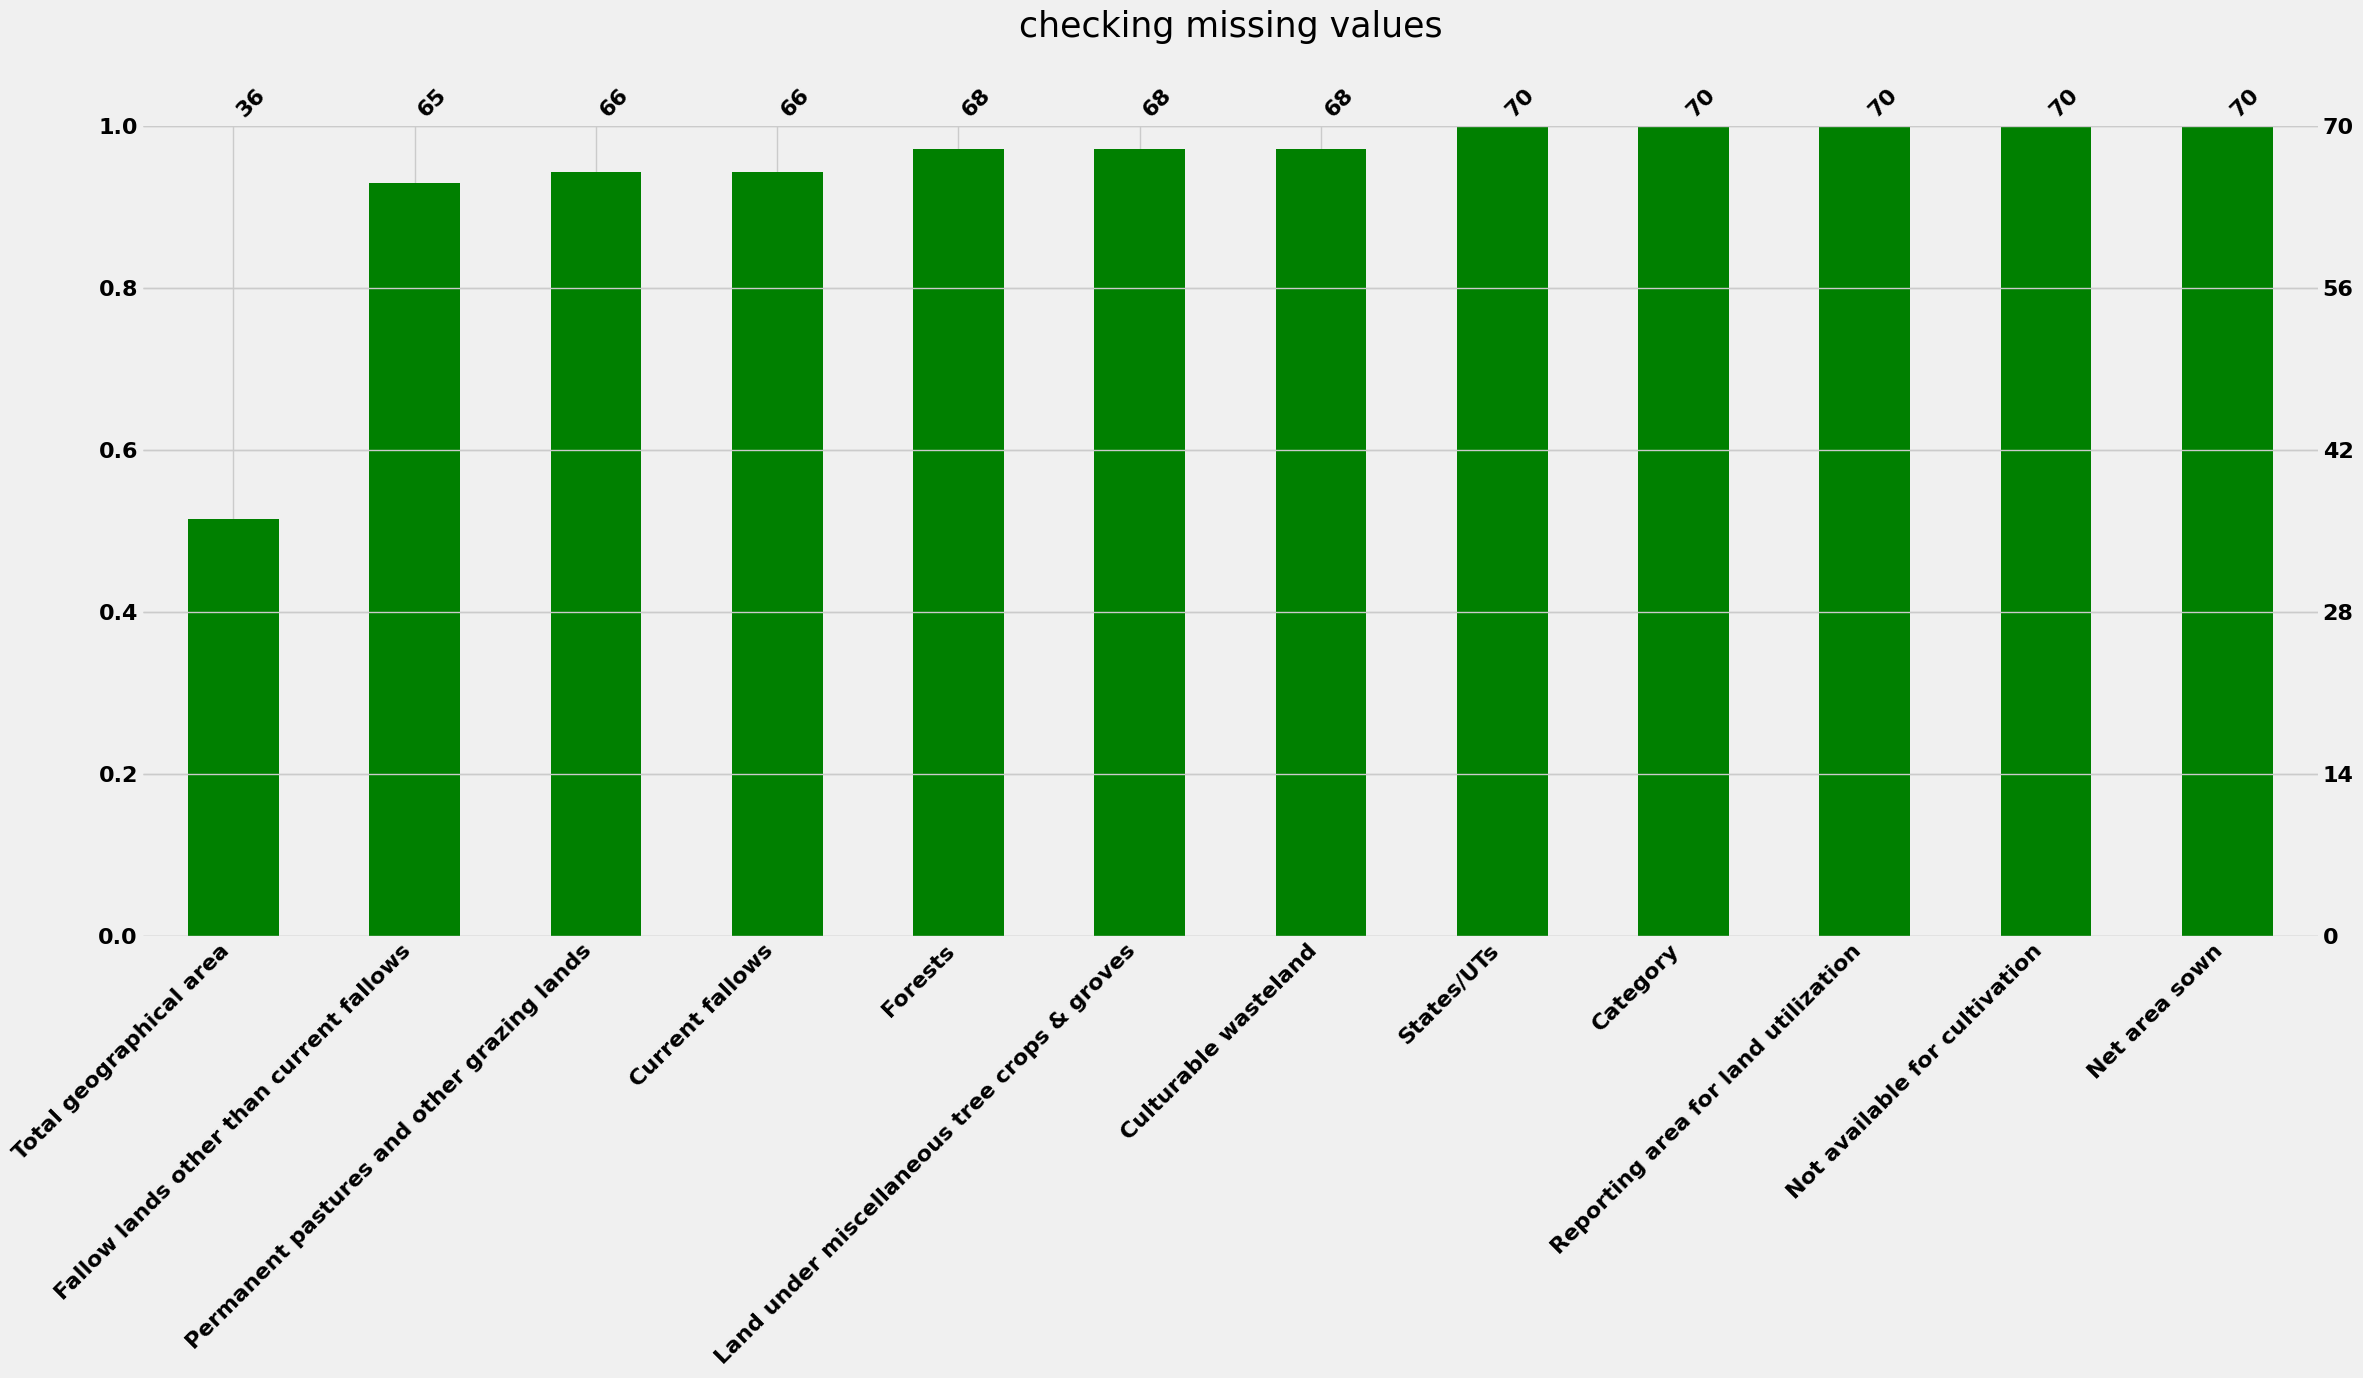

In [50]:
# checking if the data containing any null values
# visualize missing values as a matrix

mno.bar(df, color = "green", sort= "ascending")
plt.title("checking missing values\n", fontsize = 25)
plt.show()

In [51]:
df1 = df.drop(index = [i for i in range(df.shape[0]) if i%2 != 0])

In [52]:
df2 = df.drop(index = [i for i in range(df.shape[0]) if i%2 == 0])

In [53]:
df1 = df1.drop(labels= ["Category"], axis = 1)

In [54]:
df2 = df2.drop(labels= ["Category", "Total geographical area", "Reporting area for land utilization"], axis = 1)


In [55]:
df2.rename(columns = {'Not available for cultivation': "Area not available for cultivation (%)", 
                      "Forests": "Forests area (%)", 
                      "Permanent pastures and other grazing lands": "Permanent pastures and other grazing lands (%)",
                      "Land under miscellaneous tree crops & groves": "Land under miscellaneous tree crops & groves (%)",
                      "Culturable wasteland": "Culturable wasteland (%)",
                      "Fallow lands other than current fallows": "Fallow lands other than current fallows (%)",
                      "Current fallows": "Current fallow lands (%)",
                      "Net area sown": "Net area sown (%)"}, inplace = True)

In [56]:
df1.index = [i for i in range(df1.shape[0])]

In [57]:
df2.index = [i for i in range(df2.shape[0])]

In [58]:
corrected_df1 = pd.concat([df1,df2.drop(columns="States/UTs")], axis= "columns")
corrected_df1.shape

(35, 19)

In [59]:
corrected_df1.columns

Index(['States/UTs', 'Total geographical area',
       'Reporting area for land utilization', 'Forests',
       'Not available for cultivation',
       'Permanent pastures and other grazing lands',
       'Land under miscellaneous tree crops & groves', 'Culturable wasteland',
       'Fallow lands other than current fallows', 'Current fallows',
       'Net area sown', 'Forests area (%)',
       'Area not available for cultivation (%)',
       'Permanent pastures and other grazing lands (%)',
       'Land under miscellaneous tree crops & groves (%)',
       'Culturable wasteland (%)',
       'Fallow lands other than current fallows (%)',
       'Current fallow lands (%)', 'Net area sown (%)'],
      dtype='object')

In [60]:
corrected_df = corrected_df1.fillna(0)


In [61]:
corrected_df

,States/UTs,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown,Forests area (%),Area not available for cultivation (%),Permanent pastures and other grazing lands (%),Land under miscellaneous tree crops & groves (%),Culturable wasteland (%),Fallow lands other than current fallows (%),Current fallow lands (%),Net area sown (%)
0,Andhra Pradesh,27507.0,27505,6210.0,4781.0,602.0,320.0,695.0,1583.0,3166.0,10147.0,22.58,17.38,2.19,1.16,2.53,5.76,11.51,36.89
1,Arunachal Pradesh,8374.0,5659,5154.0,65.0,18.0,37.0,67.0,73.0,37.0,209.0,91.08,1.15,0.32,0.65,1.18,1.29,0.65,3.69
2,Assam,7844.0,7850,1954.0,2512.0,160.0,209.0,77.0,60.0,127.0,2753.0,24.89,32.00,2.04,2.66,0.98,0.76,1.62,35.07
3,Bihar,9416.0,9360,622.0,2083.0,17.0,240.0,46.0,129.0,666.0,5556.0,6.65,22.25,0.18,2.56,0.49,1.38,7.12,59.36
4,Chhattisgarh,13519.0,13790,6355.0,996.0,857.0,1.0,350.0,238.0,271.0,4772.0,46.08,7.22,6.21,0.01,2.54,1.73,1.97,34.24
5,Delhi,148.0,147,1.0,92.0,0.0,1.0,10.0,8.0,12.0,23.0,0.68,62.59,0.00,0.68,6.80,5.44,8.16,15.65
6,Goa,370.0,361,125.0,37.0,1.0,1.0,53.0,0.0,7.0,137.0,34.63,10.25,0.28,0.28,14.68,0.00,1.94,37.95
7,Gujarat,19602.0,18868,1854.0,3752.0,850.0,4.0,1977.0,11.0,568.0,9852.0,9.83,19.89,4.50,0.02,10.48,0.06,3.01,52.22
8,Haryana,4421.0,4372,39.0,524.0,27.0,12.0,65.0,8.0,141.0,3556.0,0.89,11.99,0.62,0.27,1.49,0.18,3.23,81.34
9,Himachal Pradesh,5567.0,4545,1101.0,1130.0,1501.0,69.0,127.0,14.0,60.0,543.0,24.22,24.86,33.03,1.52,2.79,0.31,1.32,11.95


In [62]:
corrected_df.isnull().mean().mean()

0.0

In [63]:
corrected_df.to_csv("Area_percent_separate_land_pattern.csv")

## **3. Data Visualization**

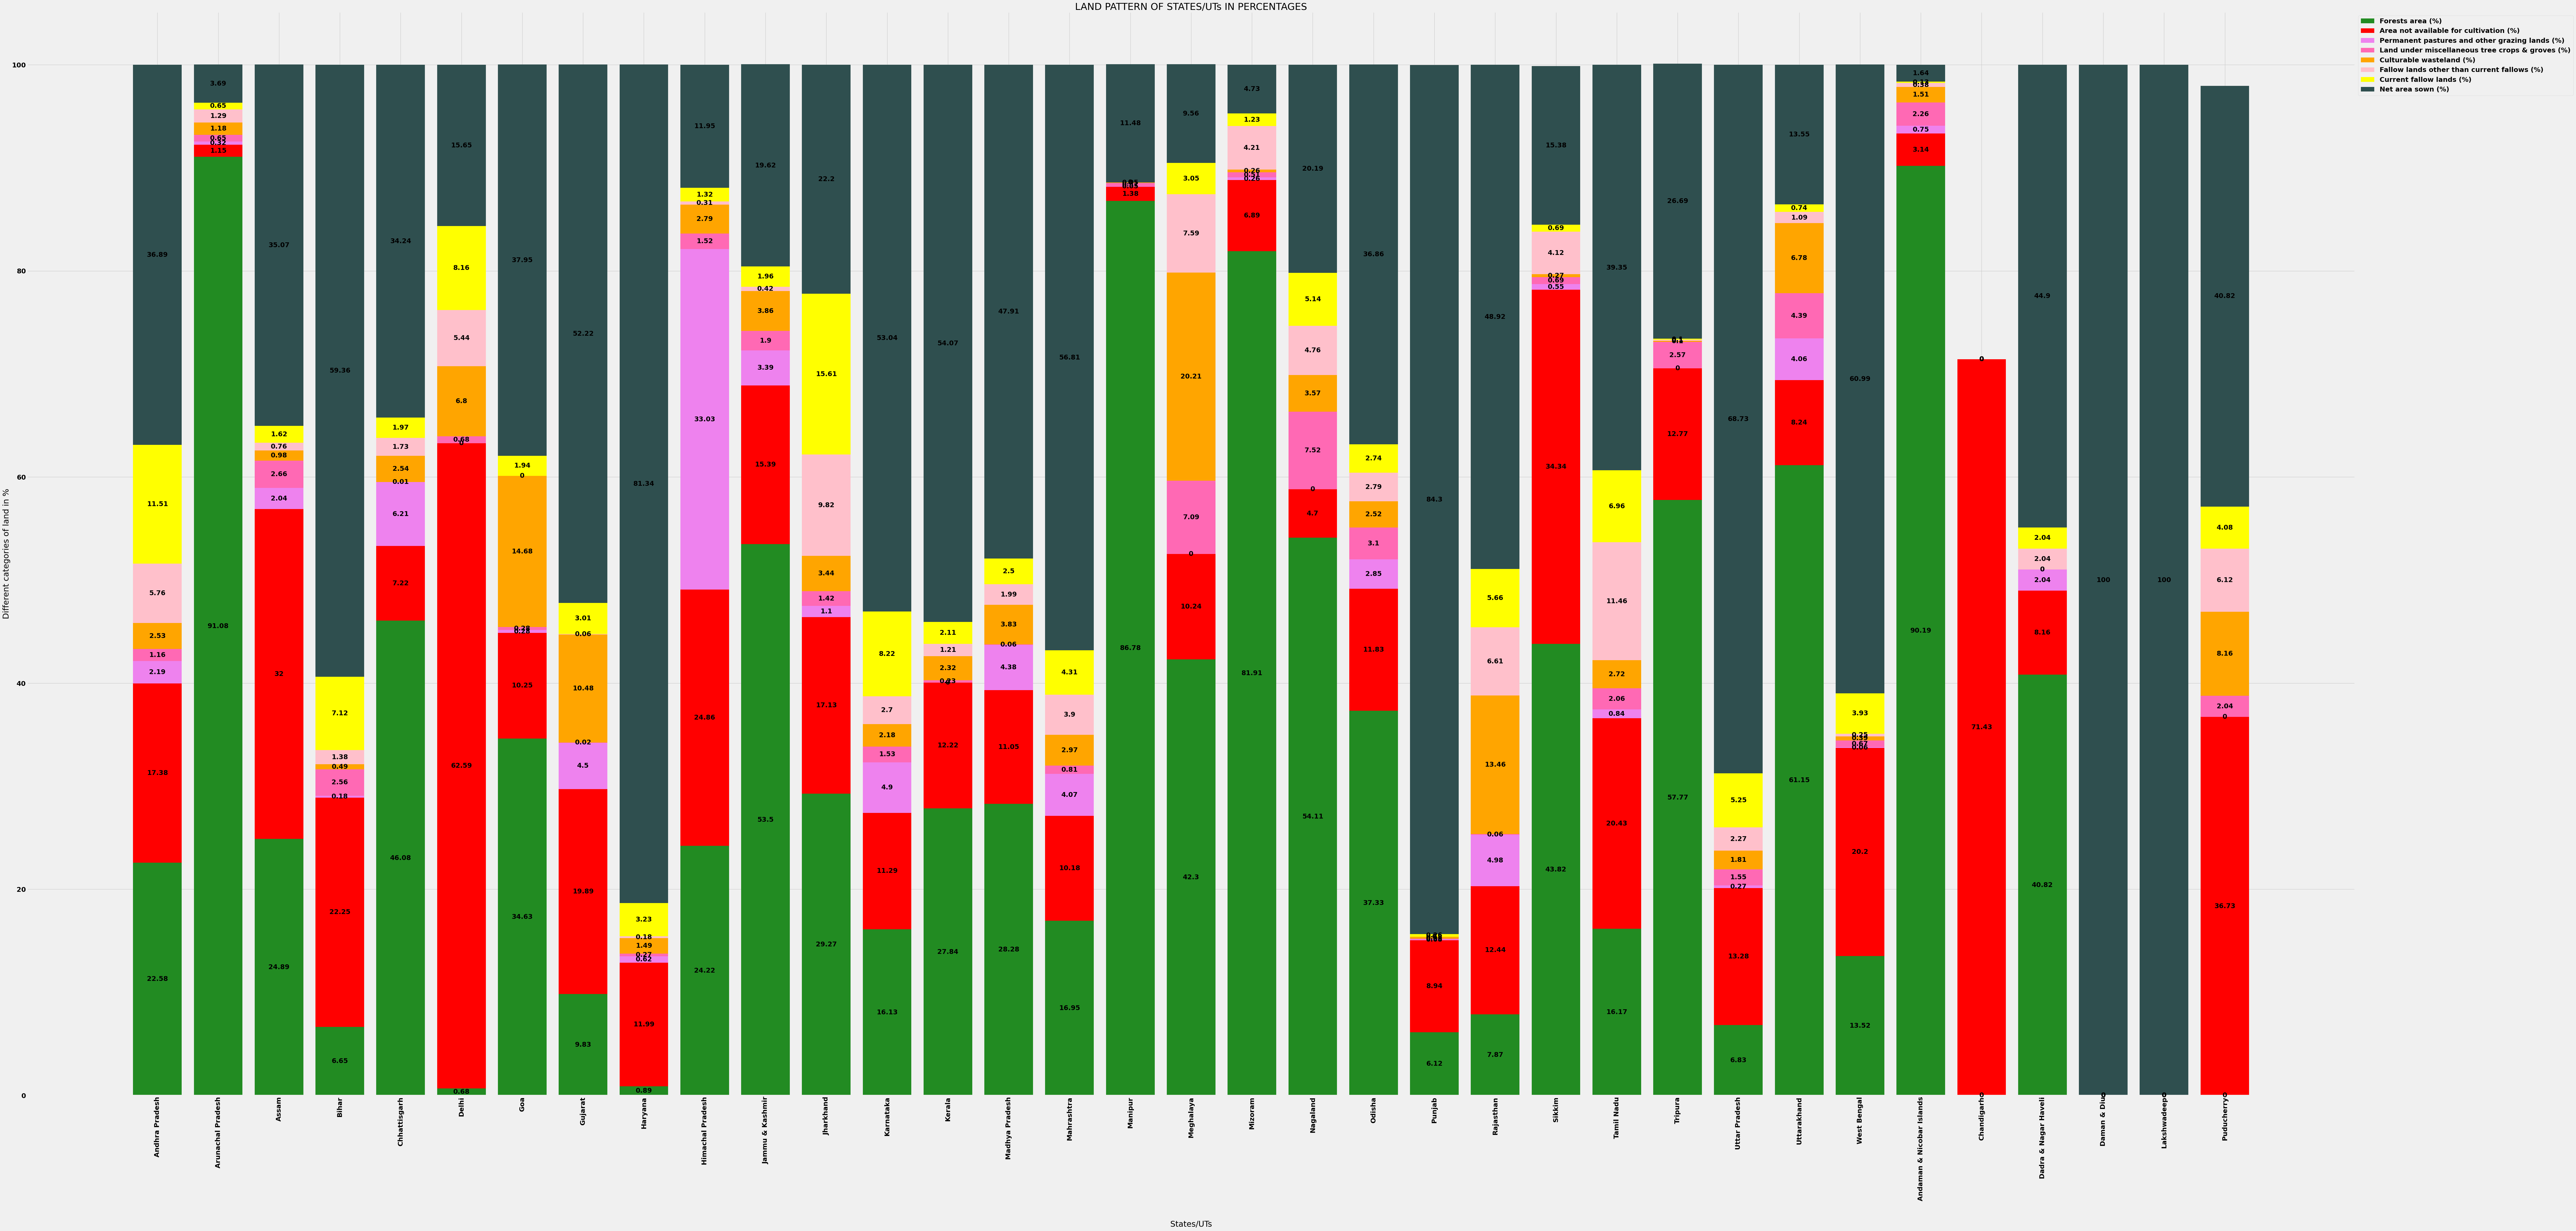

In [64]:
plt.rcParams['figure.figsize']=(100,50)
font = {
        'weight' : 'bold',
        'size' : 18
        }
plt.rc('font', **font)

y = corrected_df['States/UTs'].values
x1 = np.array(corrected_df['Forests area (%)'])
x2 = np.array(corrected_df['Area not available for cultivation (%)'])
x3 = np.array(corrected_df['Permanent pastures and other grazing lands (%)'])
x4 = np.array(corrected_df['Land under miscellaneous tree crops & groves (%)'])
x5 = np.array(corrected_df['Culturable wasteland (%)'])
x6 = np.array(corrected_df['Fallow lands other than current fallows (%)'])
x7 = np.array(corrected_df['Current fallow lands (%)'])
x8 = np.array(corrected_df['Net area sown (%)'])

# Make the plot and show it on the screen

fig, ax = plt.subplots()
p1 = ax.bar(y, x1, color= 'forestgreen', label= 'Forests area (%)')
p2 = ax.bar(y, x2, bottom=x1, color='red', label='Area not available for cultivation (%)')
p3 = ax.bar(y, x3, bottom= x1+x2, color='violet', label='Permanent pastures and other grazing lands (%)')
p4 = ax.bar(y, x4, bottom= x1+x2+x3, color='hotpink', label='Land under miscellaneous tree crops & groves (%)')
p5 = ax.bar(y, x5, bottom= x1+x2+x3+x4, color='orange', label='Culturable wasteland (%)')
p6 = ax.bar(y, x6, bottom= x1+x2+x3+x4+x5, color='pink', label='Fallow lands other than current fallows (%)')
p7 = ax.bar(y, x7, bottom= x1+x2+x3+x4+x5+x6, color='yellow', label='Current fallow lands (%)')
p8 = ax.bar(y, x8, bottom= x1+x2+x3+x4+x5+x6+x7, color='darkslategray', label='Net area sown (%)')

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
ax.bar_label(p4, label_type='center')
ax.bar_label(p5, label_type='center')
ax.bar_label(p6, label_type='center')
ax.bar_label(p7, label_type='center')
ax.bar_label(p8, label_type='center')


plt.xlabel("\n\nStates/UTs")
plt.ylabel("Different categories of land in %")
plt.title("LAND PATTERN OF STATES/UTs IN PERCENTAGES")
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1,1))
plt.show()



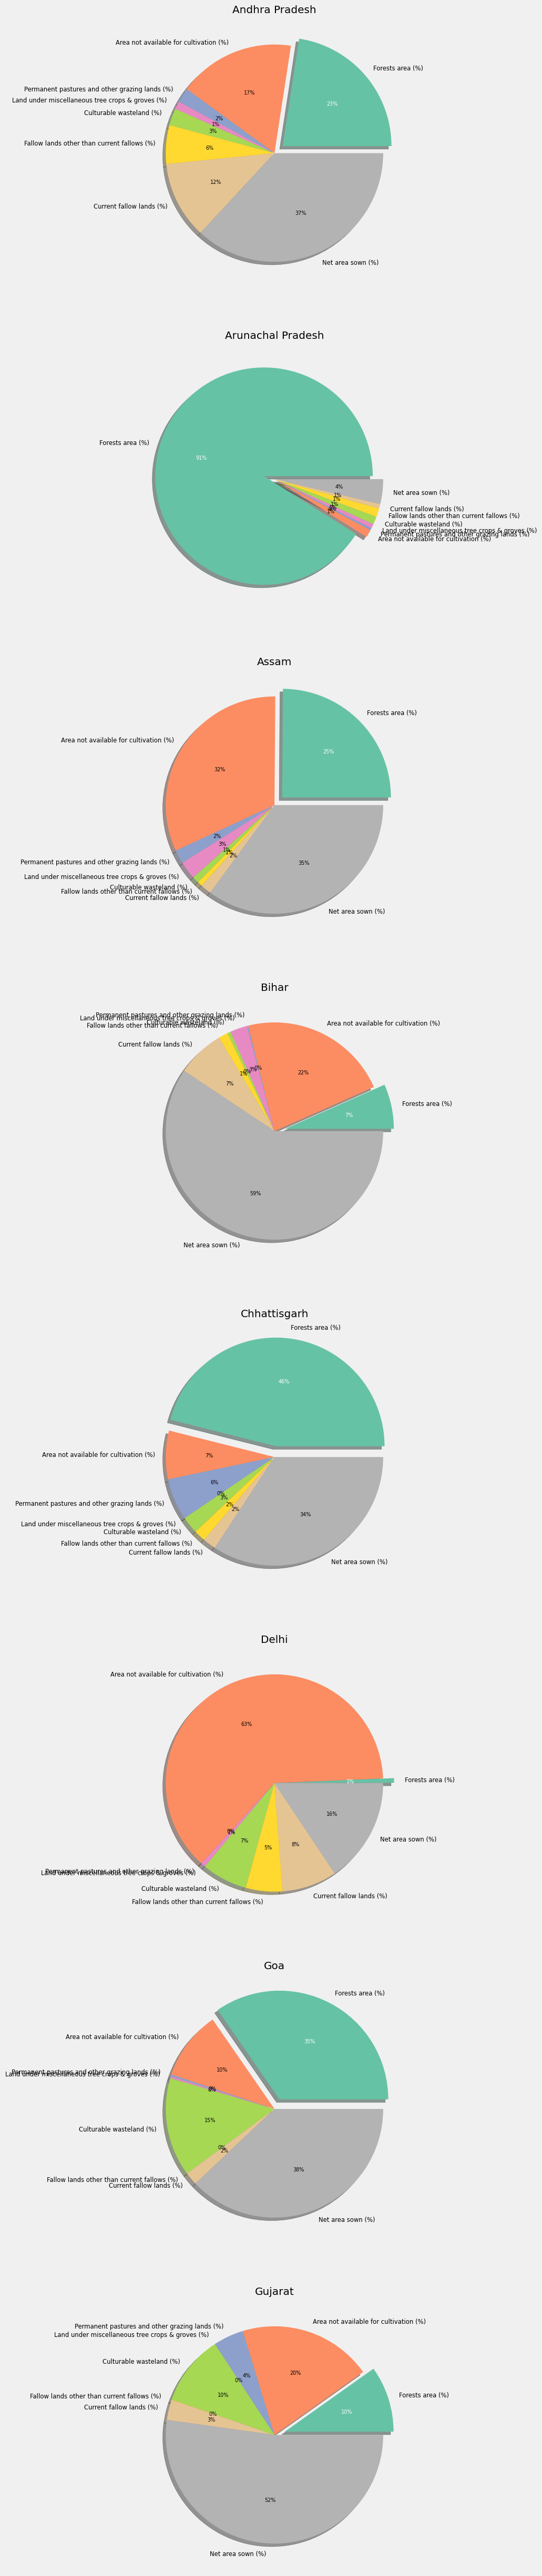

In [66]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=8,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(8):

    patches, texts, autotexts = axes[i].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i].set_title(corrected_df['States/UTs'][i])

plt.show()



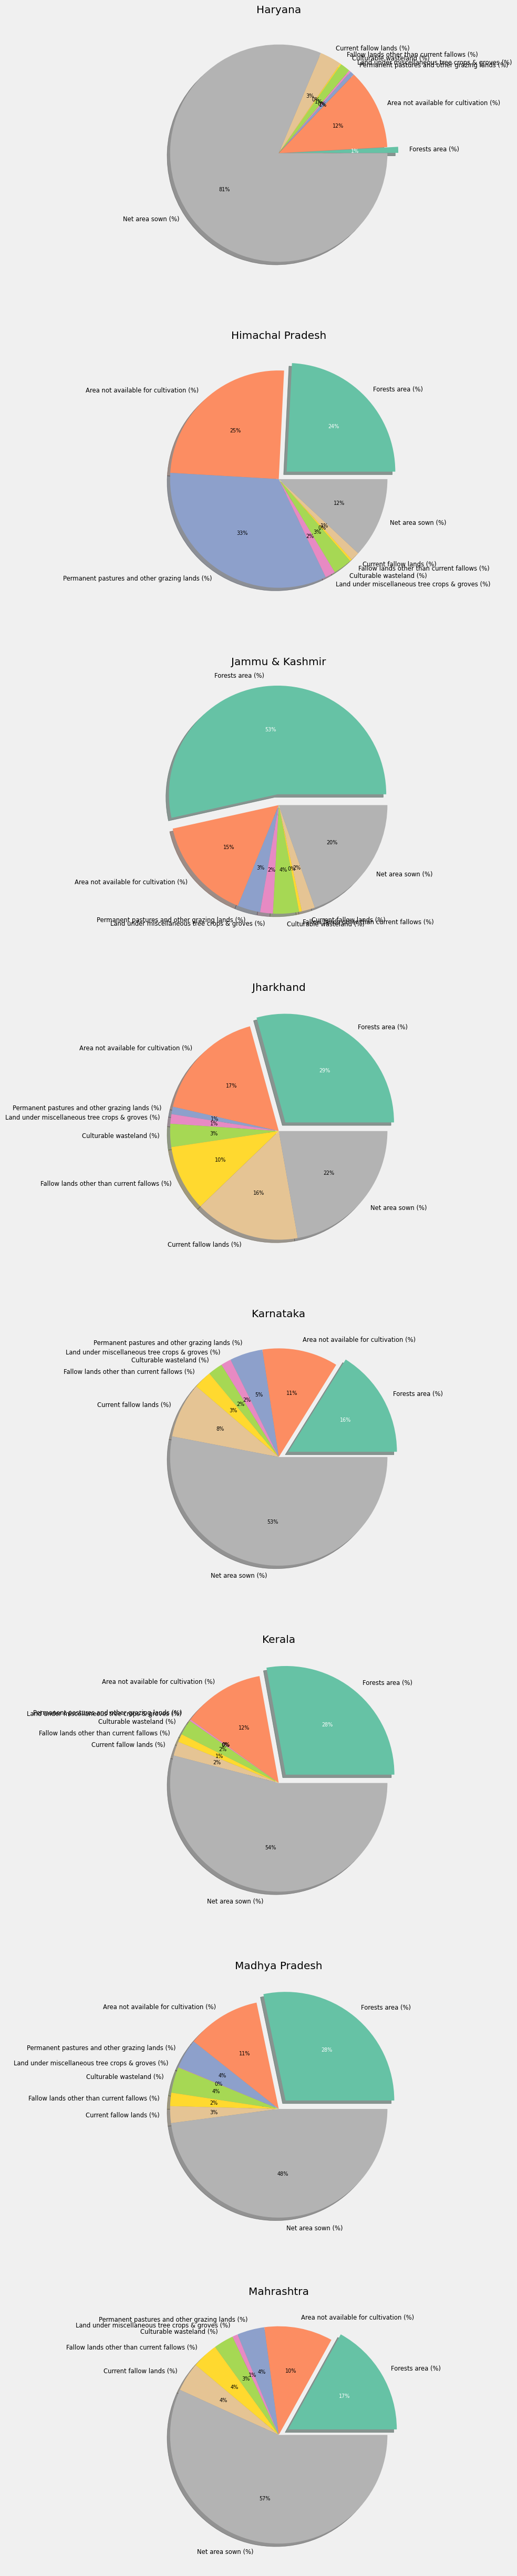

In [67]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=8,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(8,16):

    patches, texts, autotexts = axes[i-8].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i-8].set_title(corrected_df['States/UTs'][i])

plt.show()

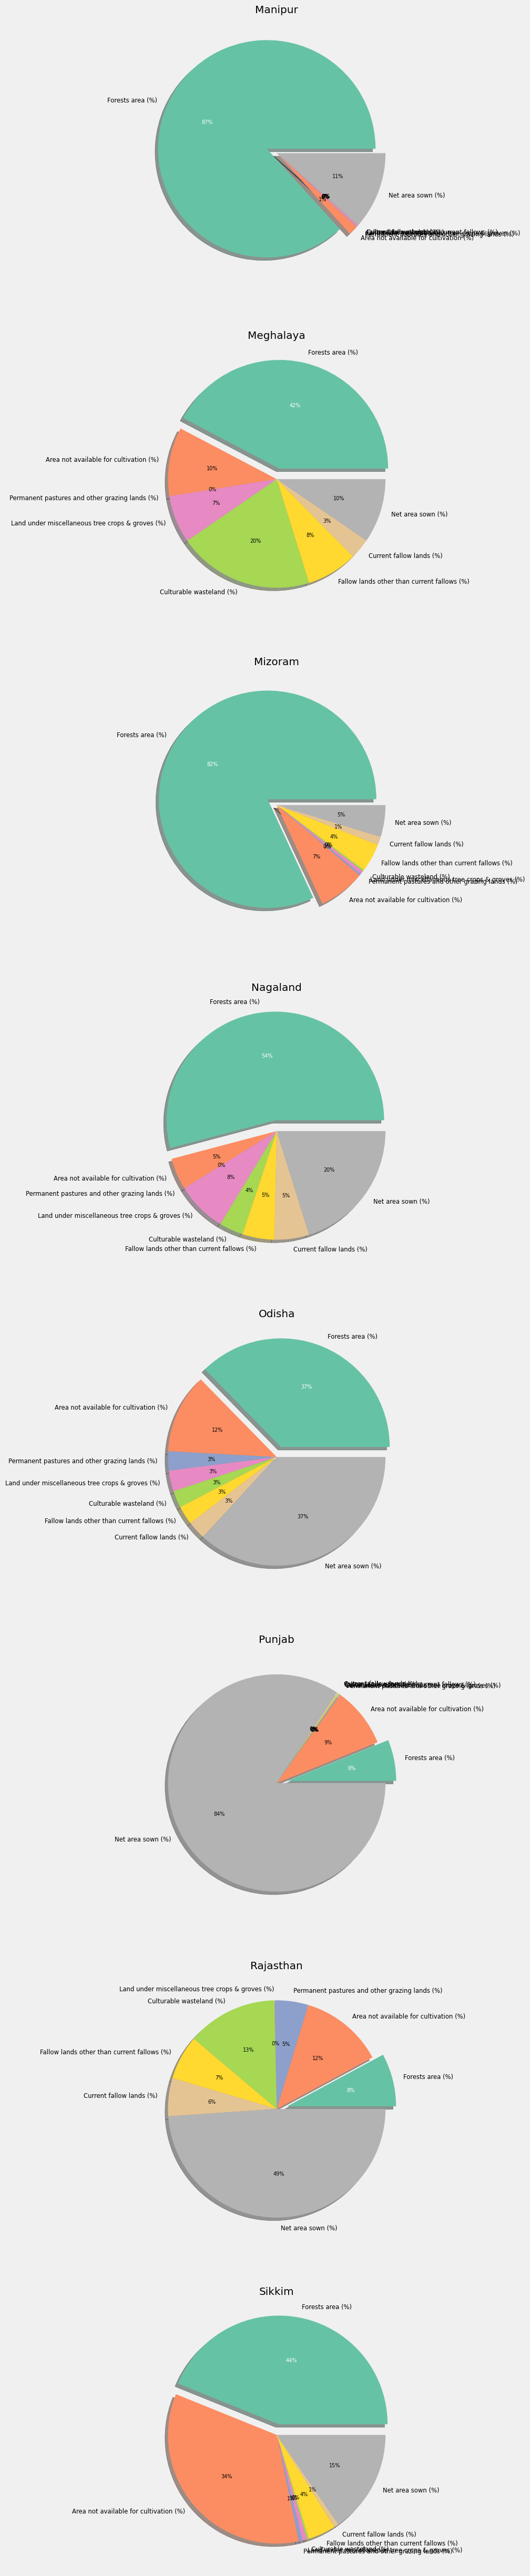

In [68]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=8,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(16, 24):

    patches, texts, autotexts = axes[i-16].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i-16].set_title(corrected_df['States/UTs'][i])

plt.show()

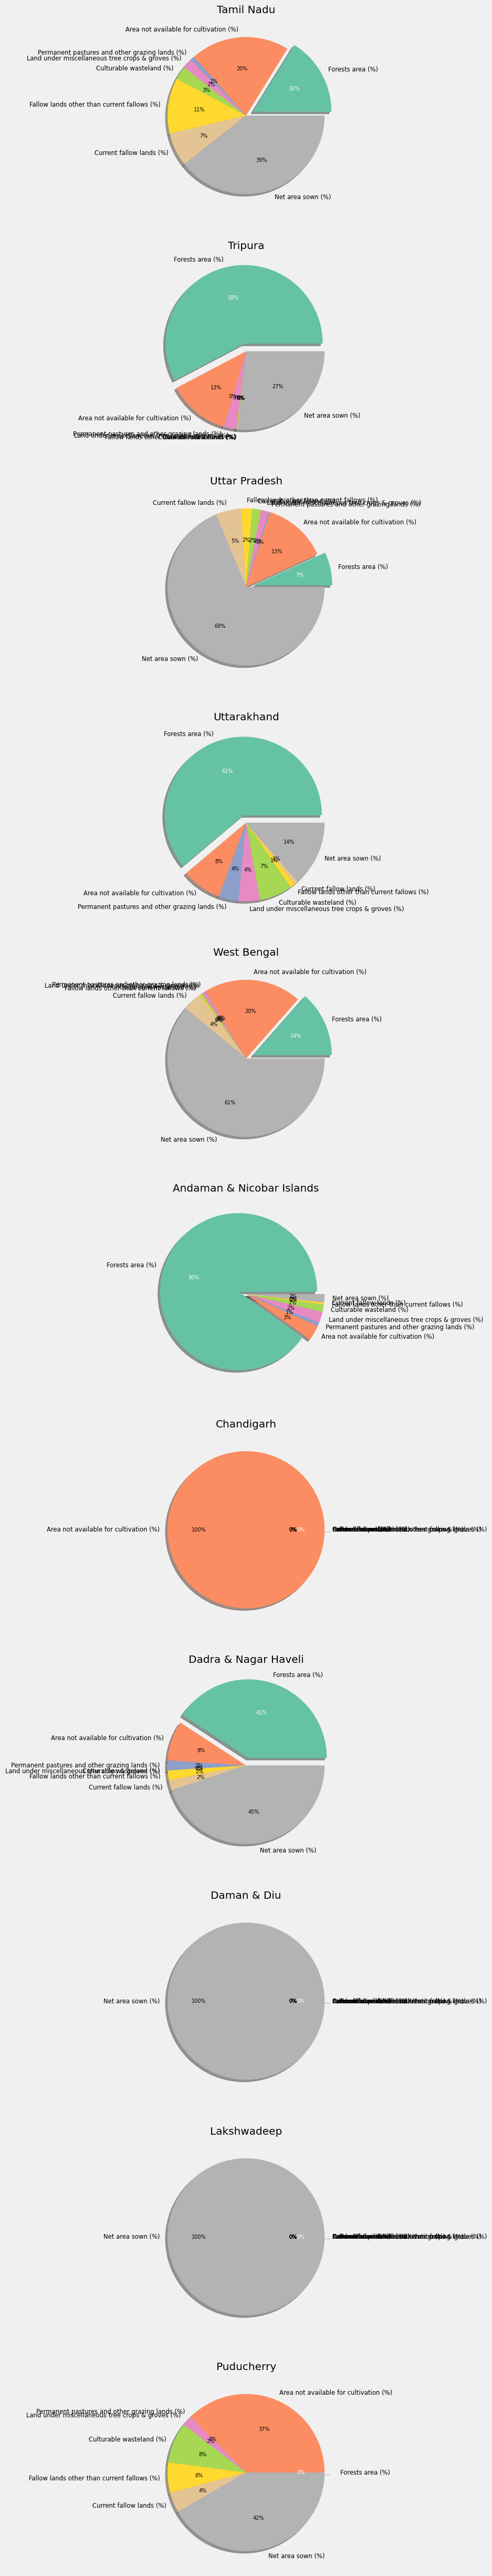

In [70]:
font = {
        'weight' : 'normal',
        'size' : 10
        }
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=11,ncols=1)
fig.set_size_inches(60, 60)

colors = sns.color_palette("Set2")



for i in range(24, 35):

    patches, texts, autotexts = axes[i-24].pie(corrected_df.loc[i,'Forests area (%)':], labels = corrected_df.columns[11:], colors = colors, autopct='%.0f%%', shadow=True,
                explode=(0.1, 0, 0, 0, 0, 0, 0, 0), textprops={'size': 'smaller'}, radius=1)
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    axes[i-24].set_title(corrected_df['States/UTs'][i])

plt.show()